## Select_and_copy_S3

Use a lat/lon bounding box and image locations in the navigation files to copy a subset of images from an S3 bucket to a local directory. Make a quick plot of the image locations copied.

In [1]:
import os
import pandas as pd
import boto3
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for North Core Banks
latmin = 34.83
latmax = 35.09
lonmin = -76.33
lonmax = -76.02

# location of navigation files
parent_dir = 'C:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\2019-10-post-Dorian_proc'
nav_files = ['2019_1011_ppk-photo-locations-mbase-GP144357.txt',\
             '2019_1011_ppk-photo-locations-mbase-GP171357.txt']

# how many rows to skip at top of file?
skiprows = [35, 35]
path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )

# note that you have to run this for n=0 to number of nav files
n=0
df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                         'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
df.describe()

# Find images outside the bounding box and put them in a new, smaller dataframe called `dfs`

dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
print("Found {} images.".format(len(dfs)))

Found 715 images.


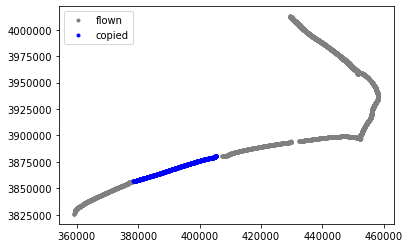

In [2]:
# Make a simple plot
easting = df['easting'].values
northing = df['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='copied')
plt.legend()
plt.show()

In [ ]:
s3_resource = boto3.resource('s3')
bucket = s3_resource.Bucket('cmgp-sfm')

icount = 0
for f in dfs['image_name'].values :
    local_dest = 'D:\\data\\HxDorian_2019\\2019-10-11_CoreBx_dng\\'+f
    try:
        src_key = '2019-10_OBX/dng/144357/'+f
        bucket.download_file(src_key, local_dest)
        print("Copied "+local_dest)
        icount = icount +1
    except:
        print("Fail: "+src_key)
        try:
            src_key = '2019-10_OBX/dng/171357/'+f
            bucket.download_file(src_key, local_dest)
            print("Copied "+local_dest)
            icount = icount +1
        except:
            print("Fail: "+src_key)
            
print("Copied {} files.".format(icount))

Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150221-DSC00384-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150222-DSC00385-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150223-DSC00386-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150224-DSC00387-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150225-DSC00388-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150226-DSC00389-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150227-DSC00390-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150228-DSC00391-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150229-DSC00392-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150230-DSC00393-N7251F.dng
Copied D:\data\HxDorian_2019\2019-10-11_CoreBx_dng\2019-1011-150231-DSC00394-N7251F.dng
Copied D:\data\HxDorian_2019\201